# Starbucks Promotional Offers Data Analyst Project
# Cleaning and Wrangling Data

In [1]:
# Import modules
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from ast import literal_eval
from sqlalchemy import create_engine

## Importing the Data
I will use the pandas library to import the data into this workbook. I will then check both the head and tail of each table to ensure that they were loaded in correctly.

In [2]:
# Load the data into pd.DataFrame objects
customers = pd.read_csv('customers.csv')
offers = pd.read_csv('offers.csv')
events = pd.read_csv('events.csv')

In [3]:
# Make sure the offers table loaded in correctly by checking the head
offers.head(3)

,offer_id,offer_type,difficulty,reward,duration,channels
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,"['email', 'mobile', 'social']"
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,"['web', 'email', 'mobile', 'social']"
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,"['web', 'email', 'mobile']"


In [4]:
# Make sure the offers table loaded in correctly by checking the tail
offers.tail(3)

,offer_id,offer_type,difficulty,reward,duration,channels
7,5a8bc65990b245e5a138643cd4eb9837,informational,0,0,3,"['email', 'mobile', 'social']"
8,f19421c1d4aa40978ebb69ca19b0e20d,bogo,5,5,5,"['web', 'email', 'mobile', 'social']"
9,2906b810c7d4411798c6938adc9daaa5,discount,10,2,7,"['web', 'email', 'mobile']"


The `offers` table looks like it has loaded in correctly. The `channels` column has values in the form of lists, which pandas does not work well with. Therefore, I will clean this up into something that is easier to use.

In [5]:
# Make sure the customers table loaded in correctly by checking the head
customers.head(3)

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,20170212,NaN,118,NaN
1,0610b486422d4921ae7d2bf64640c50b,20170715,F,55,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,20180712,NaN,118,NaN


In [6]:
# Make sure the customers table loaded in correctly by checking the tail
customers.tail(3)

,customer_id,became_member_on,gender,age,income
16997,01d26f638c274aa0b965d24cefe3183f,20170126,M,49,73000.0
16998,9dc1421481194dcd9400aec7c9ae6366,20160307,F,83,50000.0
16999,e4052622e5ba45a8b96b59aba68cf068,20170722,F,62,82000.0


The `customers` table looks like it has loaded in correctly. However, the `became_member_on` column will need to be changed into a datetime data type to make it easier to work with and more readable.

In [7]:
# Make sure the events table loaded in correctly by checking the head
events.head(3)

,customer_id,event,value,time
0,78afa995795e4d85b5d9ceeca43f5fef,offer received,{'offer id': '9b98b8c7a33c4b65b9aebfe6a799e6d9'},0
1,a03223e636434f42ac4c3df47e8bac43,offer received,{'offer id': '0b1e1539f2cc45b7b9fa7c272da2e1d7'},0
2,e2127556f4f64592b11af22de27a7932,offer received,{'offer id': '2906b810c7d4411798c6938adc9daaa5'},0


In [8]:
# Make sure the events table loaded in correctly by checking the tail
events.tail(3)

,customer_id,event,value,time
306531,a00058cf10334a308c68e7631c529907,transaction,{'amount': 3.61},714
306532,76ddbd6576844afe811f1a3c0fbb5bec,transaction,{'amount': 3.5300000000000002},714
306533,c02b10e8752c4d8e9b73f918558531f7,transaction,{'amount': 4.05},714


The `events` table looks like it has loaded in correctly. The `value` column has values in the form of dictionaries, which pandas does not work well with. Therefore, I will clean this up in something easier to use. I will also change the `time` column into more informative columns.

## Cleaning the Data
I will now clean each table in the dataset one by one. To do this, I will first make to clean the messy columns that I noticed when looking and the head and tail of each table. I will then investigate the data types of each column. At the same time, I will investigate the bit-sizes and potentail outliers of the numeric columns. I will make any necessary changes to these attributes. I will then investigate missing data and decide on an case-by-case basis what to do with the missing data. I will then specifically check if there are inconsitent text or typos in the categorical columns and make necessary fixes. I will then check for duplicated rows and decide whether it is necessary to delete them.
### `offers`
The `offers` table has a column called `channels` that is in the form of lists. Since Pandas does not work overally well with lists as values, I will create dummy variables for the individual channels.

In [9]:
# Turn channels column into list type
offers['channels'] = offers['channels'].apply(literal_eval)

# Create channels dummies
for channel in ['web', 'email', 'mobile', 'social']:
    offers[channel] = offers['channels'].apply(lambda x: 1 if channel in x else 0).astype('int8')

# Drop the original columns list
offers = offers.drop('channels', axis=1)

In [10]:
# Check the data types, size, and memory usage of the offers table
offers.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype 
---  ------      --------------  ----- 
 0   offer_id    10 non-null     object
 1   offer_type  10 non-null     object
 2   difficulty  10 non-null     int64 
 3   reward      10 non-null     int64 
 4   duration    10 non-null     int64 
 5   web         10 non-null     int8  
 6   email       10 non-null     int8  
 7   mobile      10 non-null     int8  
 8   social      10 non-null     int8  
dtypes: int64(3), int8(4), object(2)
memory usage: 1.7 KB


In [11]:
# Check the summary statistics for the numeric columns to see if we can reduce bit-sizes and identify possible outliers
offers.describe().round()

,difficulty,reward,duration,web,email,mobile,social
count,10.0,10.0,10.0,10.0,10.0,10.0,10.0
mean,8.0,4.0,6.0,1.0,1.0,1.0,1.0
std,6.0,4.0,2.0,0.0,0.0,0.0,1.0
min,0.0,0.0,3.0,0.0,1.0,0.0,0.0
25%,5.0,2.0,5.0,1.0,1.0,1.0,0.0
50%,8.0,4.0,7.0,1.0,1.0,1.0,1.0
75%,10.0,5.0,7.0,1.0,1.0,1.0,1.0
max,20.0,10.0,10.0,1.0,1.0,1.0,1.0


It looks like the `difficulty`, `reward`, and `duration` column take integer values between 0 and 20. Therefore, I will reduce the bit-sizes for those column to the minimum bit-size to reduce memory usage and optimise efficiency. I will also change the `offer_type` column to category. I know it is a categorical column because of the data dictionary. In addition, there does not seem to be any outliers or unreasonable values for the numerical columns.

In [12]:
# Reduce the bit-sizes of the numeric columns to save memory and optimise efficiency
offers = offers.astype({
    'difficulty': 'int8',
    'reward': 'int8',
    'duration': 'int8',
    'offer_type': 'category'
})

In [13]:
# Check to see if the changes occured
offers.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10 entries, 0 to 9
Data columns (total 9 columns):
 #   Column      Non-Null Count  Dtype   
---  ------      --------------  -----   
 0   offer_id    10 non-null     object  
 1   offer_type  10 non-null     category
 2   difficulty  10 non-null     int8    
 3   reward      10 non-null     int8    
 4   duration    10 non-null     int8    
 5   web         10 non-null     int8    
 6   email       10 non-null     int8    
 7   mobile      10 non-null     int8    
 8   social      10 non-null     int8    
dtypes: category(1), int8(7), object(1)
memory usage: 1.3 KB


In [14]:
# Check for any missing data
offers.isna().sum()

offer_id      0
offer_type    0
difficulty    0
reward        0
duration      0
web           0
email         0
mobile        0
social        0
dtype: int64

In [15]:
# Check for any inconsistent text or typos, specifically in category columns
offers['offer_type'].unique()

['bogo', 'informational', 'discount']
Categories (3, object): ['bogo', 'discount', 'informational']

In [16]:
# Check for any duplicate rows
offers.duplicated().sum()

0

In [17]:
# Here is the cleaned version of the offers table
offers.head(3)

,offer_id,offer_type,difficulty,reward,duration,web,email,mobile,social
0,ae264e3637204a6fb9bb56bc8210ddfd,bogo,10,10,7,0,1,1,1
1,4d5c57ea9a6940dd891ad53e9dbe8da0,bogo,10,10,5,1,1,1,1
2,3f207df678b143eea3cee63160fa8bed,informational,0,0,4,1,1,1,0


### `customers`

In [18]:
# Check the data types, size, and memory usage of the customers data frame
customers.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   customer_id       17000 non-null  object 
 1   became_member_on  17000 non-null  int64  
 2   gender            14825 non-null  object 
 3   age               17000 non-null  int64  
 4   income            14825 non-null  float64
dtypes: float64(1), int64(2), object(2)
memory usage: 2.5 MB


In [19]:
# Check the summary statistics for the numeric columns to see if we can reduce bit-sizes and identify possible outliers
customers.describe().round()

,became_member_on,age,income
count,17000.0,17000.0,14825.0
mean,20167034.0,63.0,65405.0
std,11677.0,27.0,21598.0
min,20130729.0,18.0,30000.0
25%,20160526.0,45.0,49000.0
50%,20170802.0,58.0,64000.0
75%,20171230.0,73.0,80000.0
max,20180726.0,118.0,120000.0


It looks like the `age` column take integer values between 0 and 118 and `income` takes float values between 30000 and 120000. Therefore, I will reduce the bit-sizes for those columns to the minimum bit-size to reduce memory usage and optimise efficiency. I will also change the `gender` column to category. I know it is a categorical column because of the data dictionary. In addition, I will need to change the `became_member_on` to datetime data type. A possible outlier could be 118 in the `age` column. I will investigate this more later.

In [20]:
# Convert the data types of the column in the wrong data type and reduce bit-sizes of numeric columns to save space
customers = customers.astype({
    'gender': 'category',
    'age': 'int16',
    'income': 'float32'
})

# Convert the became_member_on column to datetime dtype
customers['became_member_on'] = pd.to_datetime(customers['became_member_on'], format='%Y%m%d')

In [21]:
# Check to see if the changes occured
customers.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 17000 entries, 0 to 16999
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype         
---  ------            --------------  -----         
 0   customer_id       17000 non-null  object        
 1   became_member_on  17000 non-null  datetime64[ns]
 2   gender            14825 non-null  category      
 3   age               17000 non-null  int16         
 4   income            14825 non-null  float32       
dtypes: category(1), datetime64[ns](1), float32(1), int16(1), object(1)
memory usage: 1.6 MB


In [22]:
# Check for any missing data
customers.isna().sum()

customer_id            0
became_member_on       0
gender              2175
age                    0
income              2175
dtype: int64

In [23]:
# Investigate the rows that have missing values
customers_nan_rows = customers[customers.isna().any(axis=1)]
customers_nan_rows.head()

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,118,NaN
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,118,NaN
4,a03223e636434f42ac4c3df47e8bac43,2017-08-04,NaN,118,NaN
6,8ec6ce2a7e7949b1bf142def7d0e0586,2017-09-25,NaN,118,NaN
7,68617ca6246f4fbc85e91a2a49552598,2017-10-02,NaN,118,NaN


In [24]:
# Check to see how many rows have values missing
len(customers_nan_rows)

2175

In [25]:
# Check the ages of all the missing values
customers_nan_rows['age'].unique()

array([118], dtype=int16)

In [26]:
# Check how many 118 values there are in the age column
(customers['age'] == 118).sum()

2175

In [27]:
# Check the % of missing data
(len(customers_nan_rows) / len(customers)) * 100

12.794117647058822

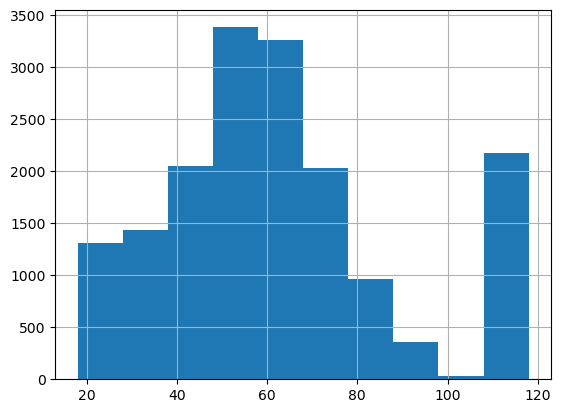

In [28]:
# Check the distribution of the age column
customers['age'].hist();

In `customers`, there are 2175 missing values each for both the `gender` and `income` columns. These missing values all occur in the same rows, meaning that there are 2175 rows that miss both the `gender` and `income` values. In addition, each one of these rows has `118` for its value for `age`, indicating that this is a placeholder for missing information. Moreover, it is skewing the distribution for the `age` column, so we will change these values to `np.NaN` values. Even though the rows with missing values make up 12.8% of our data, I will leave all the missing values as is for now so we do not lose any info when we join the tables later.

In [29]:
# Replace the values of 118 in the age column with np.NaN values
customers['age'] = customers['age'].replace({118: np.NaN})

In [30]:
# Check for dupilcate rows
customers.duplicated().sum()

0

In [31]:
# Here is the cleaned version of the customers table
customers.head(3)

,customer_id,became_member_on,gender,age,income
0,68be06ca386d4c31939f3a4f0e3dd783,2017-02-12,NaN,NaN,NaN
1,0610b486422d4921ae7d2bf64640c50b,2017-07-15,F,55.0,112000.0
2,38fe809add3b4fcf9315a9694bb96ff5,2018-07-12,NaN,NaN,NaN


### Cleaning the `events` Table
The `events` table has a column called `value` that is in the form of dictionaries. Since Pandas does not work overally well with dictionaries as values, I will seperate the keys and values into seperate columns.

In [32]:
# Turn channels column into dict type
events['value'] = events['value'].apply(literal_eval)

# Create a series that holds the dictionary keys as a list
value_keys = events['value'].apply(lambda dict: list(dict.keys()))

# Create a series that holds the dictionary values as a list
value_values = events['value'].apply(lambda dict: list(dict.values()))

In [33]:
# Check to see what values are in the dictionaries by checking the different possible keys.
value_keys.value_counts()

value
[amount]              138953
[offer id]            134002
[offer_id, reward]     33579
Name: count, dtype: int64

It looks like the `value` column has three different types of keys, which are `amount`, `offer_id`/`offer id`, and `reward`. Upon further investigation that I will omit here, the `value` values that have `amount` as their key are `transaction` events, the `value` values that just have `offer_id`/`offer id` as their key are `offer received` and `offer viewed` events, and `value` values that have both `offer_id` and `reward` as their keys are `offer completed` events. Hence, I will now create columns for these individual keys and corresponding values. However, for reward, I will just create a column called `reward` and fill it with the value or `NaN`.

In [34]:
# Create a column that hold the value key (either amount or offer id/offer_id)
events['value_key'] = value_keys.apply(lambda lst: lst[0])

# Create a column that holds the value value (either the amount or the offer id/offer_id)
events['value'] = value_values.apply(lambda lst: lst[0])

#Create a column that holds the reward value if it exists
events['reward'] = value_values.apply(lambda lst: lst[1] if len(lst) == 2 else np.NaN)

I will now change the `time` column into more informative columns. The time column shows the number of hours passed in the 30 day period. Hence, I will make a column for the day and a column for the hour of that day. I also descovered, for reasons I can not explain, that the hours are rounded to the nearest multiple of six. Luckily, this makes no significant changes to my analysis.

In [35]:
# Turn the time column into two columns that is the day number and hour of that day
events['day'] = events['time'] // 24
events['hour'] = events['time'] % 24

# Drop the original time column
events = events.drop('time', axis=1)

In [36]:
# Check the data types, size, and memory usage of the events table
events.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype  
---  ------       --------------   -----  
 0   customer_id  306534 non-null  object 
 1   event        306534 non-null  object 
 2   value        306534 non-null  object 
 3   value_key    306534 non-null  object 
 4   reward       33579 non-null   float64
 5   day          306534 non-null  int64  
 6   hour         306534 non-null  int64  
dtypes: float64(1), int64(2), object(4)
memory usage: 82.2 MB


In [37]:
# Check the summary statistics for the numeric columns to see if we can reduce bit-sizes and identify possible outliers
events.describe().round()

,reward,day,hour
count,33579.0,306534.0,306534.0
mean,5.0,15.0,6.0
std,3.0,8.0,7.0
min,2.0,0.0,0.0
25%,2.0,7.0,0.0
50%,5.0,17.0,6.0
75%,5.0,22.0,12.0
max,10.0,29.0,18.0


In [38]:
# Check if the event column is categorical and if there is any inconsistent text or typos 
events['event'].value_counts()

event
transaction        138953
offer received      76277
offer viewed        57725
offer completed     33579
Name: count, dtype: int64

In [39]:
# Check if the value_key column is categorical and if there is any inconsistent text or typos 
events['value_key'].value_counts()

value_key
amount      138953
offer id    134002
offer_id     33579
Name: count, dtype: int64

In [40]:
# Fix the inconsitent text
events['value_key'] = events['value_key'].replace({'offer_id': 'offer id'})

In [41]:
# Check to see if the inconsitent text was fixed
events['value_key'].value_counts()

value_key
offer id    167581
amount      138953
Name: count, dtype: int64

In [42]:
# Convert the data types of the column in the wrong data type and reduce bit-sizes of numeric columns to save space
events = events.astype({
    'event': 'category',
    'value_key': 'category',
    'reward': 'float32',
    'day': 'int8',
    'hour': 'int8'
})

In [43]:
# Check to see if the changes occured
events.info(memory_usage='deep')

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306534 entries, 0 to 306533
Data columns (total 7 columns):
 #   Column       Non-Null Count   Dtype   
---  ------       --------------   -----   
 0   customer_id  306534 non-null  object  
 1   event        306534 non-null  category
 2   value        306534 non-null  object  
 3   value_key    306534 non-null  category
 4   reward       33579 non-null   float32 
 5   day          306534 non-null  int8    
 6   hour         306534 non-null  int8    
dtypes: category(2), float32(1), int8(2), object(2)
memory usage: 43.2 MB


In [44]:
# Check for missing values
events.isna().sum()

customer_id         0
event               0
value               0
value_key           0
reward         272955
day                 0
hour                0
dtype: int64

These missing values are a reflection of the amount of events in the table that are not `offer completed`. Therefore we want these values to remain missing.

In [45]:
# Check for duplicate rows
events.duplicated().sum()

397

In [46]:
# Investigate the duplicate rows
events_dup_rows = events[events.duplicated()]
events_dup_rows.head()

,customer_id,event,value,value_key,reward,day,hour
66123,3dde94fa581145cb9f206624f1a94d5a,offer completed,2906b810c7d4411798c6938adc9daaa5,offer id,2.0,7,0
66783,e9fb6ed2cecb4980ba98c86abc9c91e3,offer completed,ae264e3637204a6fb9bb56bc8210ddfd,offer id,10.0,7,0
67614,a7dc060f6fc94ca7bf71fbb188187dca,offer completed,9b98b8c7a33c4b65b9aebfe6a799e6d9,offer id,5.0,7,0
68562,30478a4c1e884a63a822aa87b833ed7a,offer completed,2298d6c36e964ae4a3e7e9706d1fb8c2,offer id,3.0,7,0
69218,84fb57a7fe8045a8bf6236738ee73a0f,offer completed,ae264e3637204a6fb9bb56bc8210ddfd,offer id,10.0,7,0


In [47]:
# Investigate the event types of the duplicate rows
events_dup_rows['event'].unique()

['offer completed']
Categories (4, object): ['offer completed', 'offer received', 'offer viewed', 'transaction']

In [48]:
# Investigate the offer types of duplicate rows
events_dup_rows.merge(offers, how='inner', left_on='value', right_on='offer_id')['offer_type'].unique()

['discount', 'bogo']
Categories (3, object): ['bogo', 'discount', 'informational']

The only consitency with all the duplicate values in the `events` table is that they are all `offer completed` events. There will be no analysis on duplicate rows in our analysis. So I will delete them.

In [49]:
# Drop the duplicates in the events table
events = events.drop_duplicates()

Since the `events` table has has four distinct events. It seems benificial to break up the `events` table into the four distinct tables and clean the now seperate tables accordingly

In [50]:
# Divide the events table into each event type
def divide_table(event):
    filtered_table = events[events['event'] == event]
    filtered_table = filtered_table.drop('event', axis=1)
    if event == 'offer completed':
        filtered_table = filtered_table.drop('value_key', axis=1).rename({'value': 'offer_id'}, axis=1)
    elif event == 'transaction':
        filtered_table = filtered_table.drop(['reward', 'value_key'], axis=1).rename({'value': 'amount'}, axis=1)
    else:
        filtered_table = filtered_table.drop(['reward', 'value_key'], axis=1).rename({'value': 'offer_id'}, axis=1)
    return filtered_table

offers_completed = divide_table('offer completed')
offers_received = divide_table('offer received')
offers_viewed = divide_table('offer viewed')
transactions = divide_table('transaction')

In [51]:
# Here are the cleaned offers_completed events from the events table
offers_completed.head(3)

,customer_id,offer_id,reward,day,hour
12658,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,2906b810c7d4411798c6938adc9daaa5,2.0,0,0
12672,fe97aa22dd3e48c8b143116a8403dd52,fafdcd668e3743c1bb461111dcafc2a4,2.0,0,0
12679,629fc02d56414d91bca360decdfa9288,9b98b8c7a33c4b65b9aebfe6a799e6d9,5.0,0,0


In [52]:
# Here are the cleaned offers_received events from the events table
offers_received.head(3)

,customer_id,offer_id,day,hour
0,78afa995795e4d85b5d9ceeca43f5fef,9b98b8c7a33c4b65b9aebfe6a799e6d9,0,0
1,a03223e636434f42ac4c3df47e8bac43,0b1e1539f2cc45b7b9fa7c272da2e1d7,0,0
2,e2127556f4f64592b11af22de27a7932,2906b810c7d4411798c6938adc9daaa5,0,0


In [53]:
# Here are the cleaned offers_viewed events from the events table
offers_viewed.head(3)

,customer_id,offer_id,day,hour
12650,389bc3fa690240e798340f5a15918d5c,f19421c1d4aa40978ebb69ca19b0e20d,0,0
12651,d1ede868e29245ea91818a903fec04c6,5a8bc65990b245e5a138643cd4eb9837,0,0
12652,102e9454054946fda62242d2e176fdce,4d5c57ea9a6940dd891ad53e9dbe8da0,0,0


In [54]:
# Here are the cleaned transactions events from the events table
transactions.head(3)

,customer_id,amount,day,hour
12654,02c083884c7d45b39cc68e1314fec56c,0.83,0,0
12657,9fa9ae8f57894cc9a3b8a9bbe0fc1b2f,34.56,0,0
12659,54890f68699049c2a04d415abc25e717,13.23,0,0


Since SQL is better and joining and querying tables than Python, I will export all the cleaned tables to MySQL for some exploratory data analysis.

## Exporting Data to MySQL

The following cells will not run. This is because they would cause an error because I have removed my password for security purposes 

In [55]:
# Create a connection to the MySQL database (the password has been hidden)
user = 'root'
password = '' 
host = 'localhost'
port = '3306'
database = 'starbucks_promotions_db'

engine = create_engine(f'mysql+mysqlconnector://{user}:{password}@{host}:{port}/{database}')

In [56]:
# Export the tables to MySQL
data = [offers, customers, offers_received, offers_viewed, offers_completed, transactions]
table_names = ['offers', 'customers', 'offers_received', 'offers_viewed', 'offers_completed', 'transactions']

for i, table in enumerate(data):
    table.to_sql(table_names[i], con=engine, if_exists='replace', index=False)